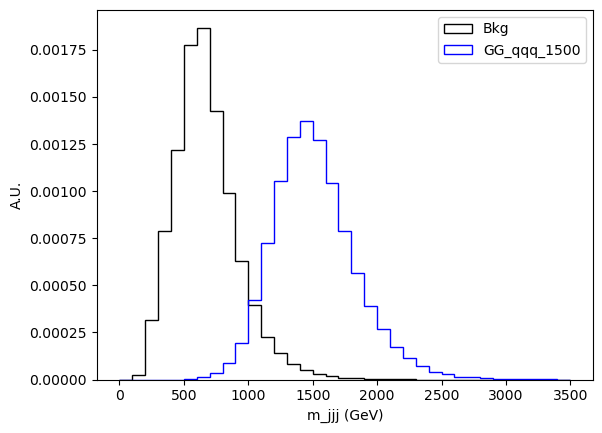

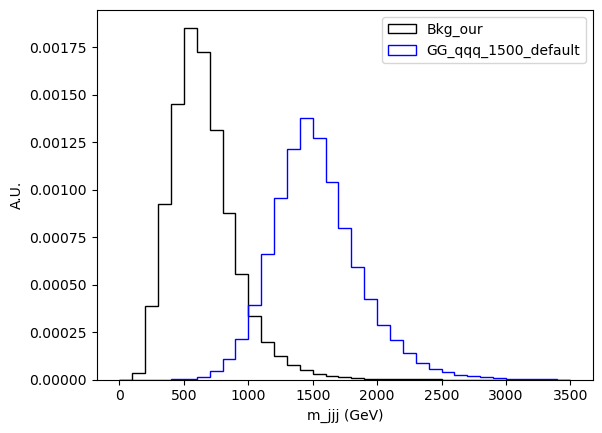

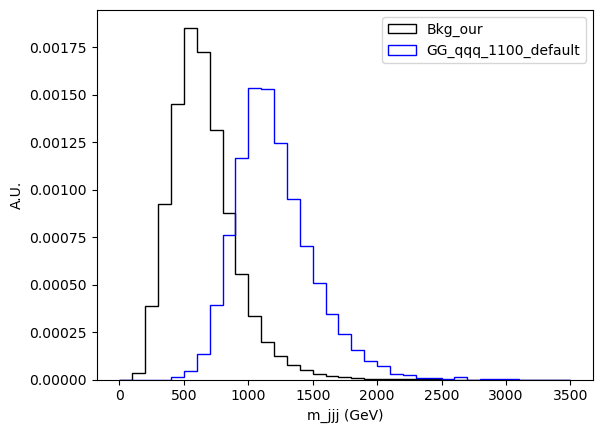

In [10]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

def plot_histogram(file_s, file_b, label_s, label_b):
    s = h5py.File(file_s, "r")
    b = h5py.File(file_b, "r")

    smavg = np.array(s["pred_ptetaphim_max"][:,:,-1].mean(-1))
    bmavg = np.array(b["pred_ptetaphim_max"][:,:,-1].mean(-1))

    bins = np.linspace(0, 3500, 36)
    density = True

    plt.hist(bmavg, density=density, bins=bins, histtype="step", color="black", label=label_b)
    plt.hist(smavg, density=density, bins=bins, histtype="step", color="blue", label=label_s)

    s.close()
    b.close()

plot_histogram("evaluate/GG_qqq_1500_transformer_classifier.h5", "evaluate/Bkg.sampled_200k_transformer_classifier.h5", "GG_qqq_1500", "Bkg")
plt.legend()
plt.xlabel('m_jjj (GeV)')
plt.ylabel('A.U.') 
plt.figure()
plot_histogram("evaluate/GG_qqq_1500_transformer_classifier_our.h5", "evaluate/Bkg.sampled_200k_transformer_classifier_our.h5", "GG_qqq_1500_default", "Bkg_our")
plt.legend()
plt.xlabel('m_jjj (GeV)')
plt.ylabel('A.U.') 
plt.figure()
plot_histogram("evaluate/GG_qqq_1100.sampled_10k_transformer_classifier_our.h5", "evaluate/Bkg.sampled_200k_transformer_classifier_our.h5", "GG_qqq_1100_default", "Bkg_our")
plt.legend()
plt.xlabel('m_jjj (GeV)')
plt.ylabel('A.U.') 
plt.show()


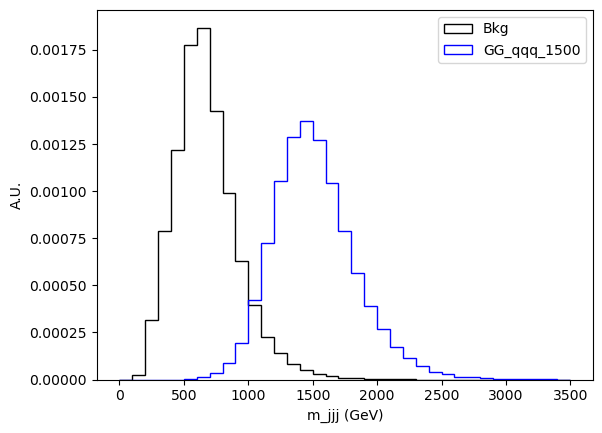

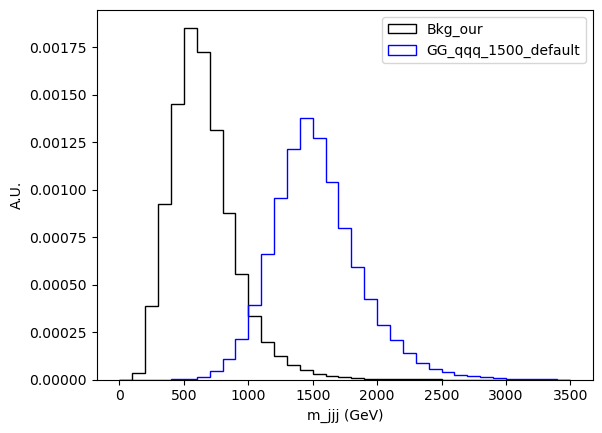

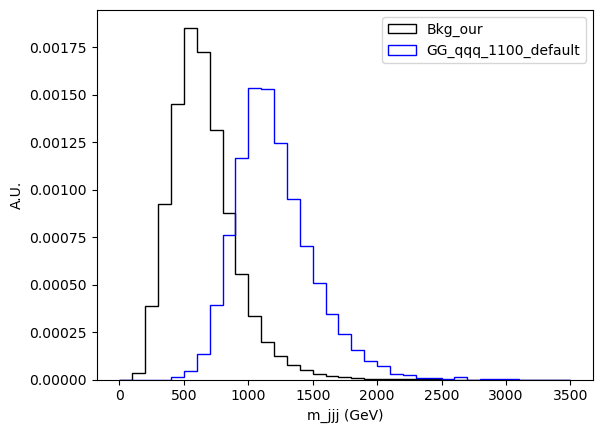

In [ ]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

def plot_histogram(file_s, file_b, label_s, label_b):
    s = h5py.File(file_s, "r")
    b = h5py.File(file_b, "r")

    smavg = np.array(s["pred_ptetaphim_max"][:,:,-1].mean(-1))
    bmavg = np.array(b["pred_ptetaphim_max"][:,:,-1].mean(-1))

    bins = np.linspace(0, 3500, 36)
    density = True

    plt.hist(bmavg, density=density, bins=bins, histtype="step", color="black", label=label_b)
    plt.hist(smavg, density=density, bins=bins, histtype="step", color="blue", label=label_s)

    s.close()
    b.close()

plot_histogram("evaluate/GG_qqq_1500_transformer_classifier.h5", "evaluate/Bkg.sampled_200k_transformer_classifier.h5", "GG_qqq_1500", "Bkg")
plt.legend()
plt.xlabel('m_jjj (GeV)')
plt.ylabel('A.U.') 
plt.figure()
plot_histogram("evaluate/GG_qqq_1500_transformer_classifier_our.h5", "evaluate/Bkg.sampled_200k_transformer_classifier_our.h5", "GG_qqq_1500_default", "Bkg_our")
plt.legend()
plt.xlabel('m_jjj (GeV)')
plt.ylabel('A.U.') 
plt.figure()
plot_histogram("evaluate/GG_qqq_1100.sampled_10k_transformer_classifier_our.h5", "evaluate/Bkg.sampled_200k_transformer_classifier_our.h5", "GG_qqq_1100_default", "Bkg_our")
plt.legend()
plt.xlabel('m_jjj (GeV)')
plt.ylabel('A.U.') 
plt.show()


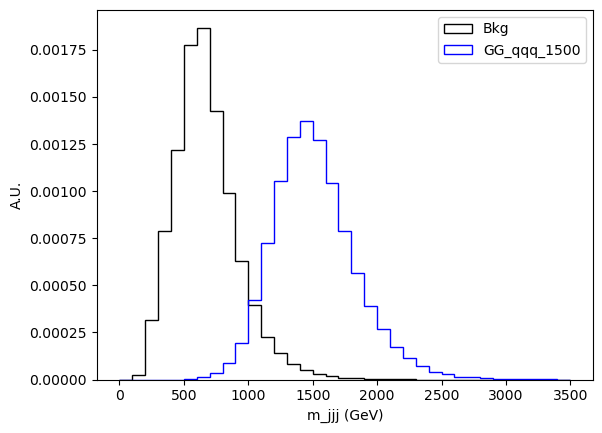

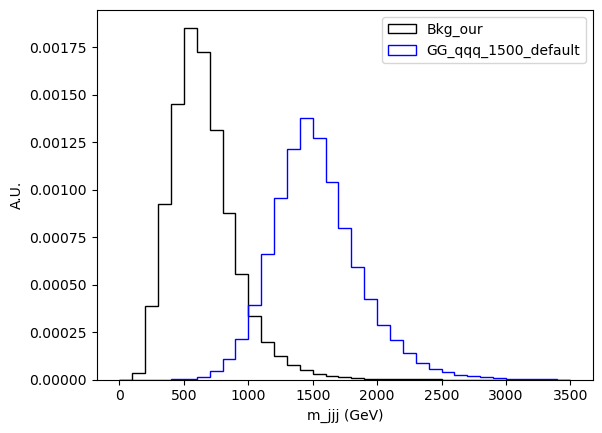

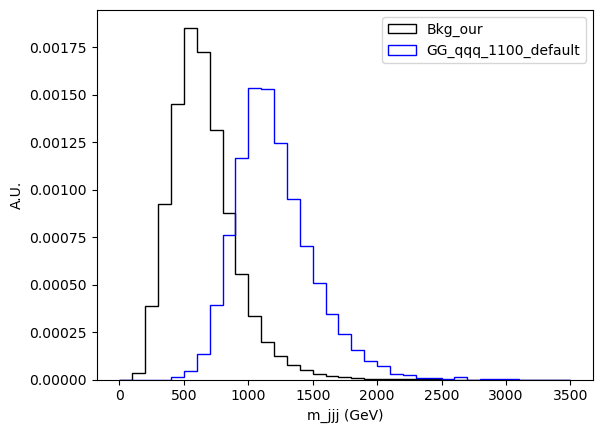

In [ ]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

def plot_histogram(file_s, file_b, label_s, label_b):
    s = h5py.File(file_s, "r")
    b = h5py.File(file_b, "r")

    smavg = np.array(s["pred_ptetaphim_max"][:,:,-1].mean(-1))
    bmavg = np.array(b["pred_ptetaphim_max"][:,:,-1].mean(-1))

    bins = np.linspace(0, 3500, 36)
    density = True

    plt.hist(bmavg, density=density, bins=bins, histtype="step", color="black", label=label_b)
    plt.hist(smavg, density=density, bins=bins, histtype="step", color="blue", label=label_s)

    s.close()
    b.close()

plot_histogram("evaluate/GG_qqq_1500_transformer_classifier.h5", "evaluate/Bkg.sampled_200k_transformer_classifier.h5", "GG_qqq_1500", "Bkg")
plt.legend()
plt.xlabel('m_jjj (GeV)')
plt.ylabel('A.U.') 
plt.figure()
plot_histogram("evaluate/GG_qqq_1500_transformer_classifier_our.h5", "evaluate/Bkg.sampled_200k_transformer_classifier_our.h5", "GG_qqq_1500_default", "Bkg_our")
plt.legend()
plt.xlabel('m_jjj (GeV)')
plt.ylabel('A.U.') 
plt.figure()
plot_histogram("evaluate/GG_qqq_1100.sampled_10k_transformer_classifier_our.h5", "evaluate/Bkg.sampled_200k_transformer_classifier_our.h5", "GG_qqq_1100_default", "Bkg_our")
plt.legend()
plt.xlabel('m_jjj (GeV)')
plt.ylabel('A.U.') 
plt.show()
